In [14]:
import os
import shutil
from pathlib import Path
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.model_selection import train_test_split

In [2]:
first_dataset = Path("/kaggle/input/strawberry-dataset/strawberry")
second_dataset = Path("/kaggle/input/images-of-strawberry-leaves-for-tipburn-detection/dataset - strawberry leaves")
output_dir = Path("/kaggle/working/ready_dataset")

classes = ["Calciumdeficiency", "healthy"]

for split in ["train", "val", "test"]:  
    for class_name in classes:
        os.makedirs(output_dir / split / class_name, exist_ok=True)

shutil.copytree(first_dataset / "train", output_dir / "train", dirs_exist_ok=True)
shutil.copytree(first_dataset / "test", output_dir / "test", dirs_exist_ok=True)
shutil.copytree(first_dataset / "valid", output_dir / "val", dirs_exist_ok=True)

for class_name in classes:
    files = list((second_dataset / class_name).glob("*"))
    
    train_files, val_test_files = train_test_split(
        files, 
        test_size=0.3,
        random_state=42,
        shuffle=True
    )
    
    val_files, test_files = train_test_split(
        val_test_files,
        test_size=1/3,
        random_state=42
    )
    
    for file in train_files:
        shutil.copy(file, output_dir / "train" / class_name)
    
    for file in val_files:
        shutil.copy(file, output_dir / "val" / class_name)
    
    for file in test_files:
        shutil.copy(file, output_dir / "test" / class_name)

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.8/974.8 kB 16.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 882.8 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 14.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 7.2 MB/s eta 0:00:000:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found

In [4]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
model = YOLO("yolo11m-cls")

result = model.train(
    data='/kaggle/working/ready_dataset',
    epochs=150,
    imgsz=320, 
    patience=40,
    optimizer='AdamW',

    degrees=10,
    shear=5,
    batch=32,

    save=True,
    plots=True,
    name='strawberrie_cls_model',
)

100%|██████████| 22.4M/22.4M [00:00<00:00, 28.0MB/s]


Ultralytics 8.3.108 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=classify, mode=train, model=yolo11m-cls.pt, data=/kaggle/working/ready_dataset, epochs=150, time=None, patience=40, batch=32, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=strawberrie_cls_model, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

E0000 00:00:1744673403.056170      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744673403.113007      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 15.9MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/ready_dataset/train... 7400 images, 0 corrupt: 100%|██████████| 7400/7400 [01:58<00:00, 62.30it/s]  

train: WARNING ⚠️ /kaggle/working/ready_dataset/train/Calciumdeficiency/10.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /kaggle/working/ready_dataset/train/Calciumdeficiency/100.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /kaggle/working/ready_dataset/train/Calciumdeficiency/103.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /kaggle/working/ready_dataset/train/Calciumdeficiency/1039.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /kaggle/working/ready_dataset/train/Calciumdeficiency/104.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /kaggle/working/ready_dataset/train/Calciumdeficiency/105.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /kaggle/working/ready_dataset/train/Calciumdeficiency/106.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /kaggle/working/ready_dataset/train/Calciumdeficiency/107.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /kaggle/working/ready_dataset/train/Calciumdeficiency/109.jpg: corrupt JPEG re

train: New cache created: /kaggle/working/ready_dataset/train.cache


val: Scanning /kaggle/working/ready_dataset/val... 914 images, 0 corrupt: 100%|██████████| 914/914 [00:38<00:00, 23.75it/s] 

val: WARNING ⚠️ /kaggle/working/ready_dataset/val/Calciumdeficiency/1.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /kaggle/working/ready_dataset/val/Calciumdeficiency/101.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /kaggle/working/ready_dataset/val/Calciumdeficiency/108.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /kaggle/working/ready_dataset/val/Calciumdeficiency/112.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /kaggle/working/ready_dataset/val/Calciumdeficiency/114.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /kaggle/working/ready_dataset/val/Calciumdeficiency/118.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /kaggle/working/ready_dataset/val/Calciumdeficiency/123.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /kaggle/working/ready_dataset/val/Calciumdeficiency/136.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /kaggle/working/ready_dataset/val/Calciumdeficiency/137.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /kagg

optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 49 weight(decay=0.0), 50 weight(decay=0.0005), 50 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 4 dataloader workers
Logging results to runs/classify/strawberrie_cls_model
Starting training for 150 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/150         3G      1.173         32        320:   3%|▎         | 7/232 [00:03<01:20,  2.81it/s]

      1/150         3G      1.094         32        320:   3%|▎         | 8/232 [00:03<01:21,  2.75it/s]
  0%|          | 0.00/755k [00:00<?, ?B/s]
100%|██████████| 755k/755k [00:00<00:00, 4.72MB/s]
      1/150      3.02G      0.489          8        320: 100%|██████████| 232/232 [03:47<00:00,  1.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:33<00:00,  2.24s/it]

                   all      0.449          1



      Epoch    GPU_mem       loss  Instances       Size


      2/150      3.42G     0.5295          8        320: 100%|██████████| 232/232 [03:35<00:00,  1.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:34<00:00,  2.33s/it]

                   all      0.734          1



      Epoch    GPU_mem       loss  Instances       Size


      3/150      3.42G     0.5439          8        320: 100%|██████████| 232/232 [03:21<00:00,  1.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:28<00:00,  1.89s/it]

                   all      0.677          1



      Epoch    GPU_mem       loss  Instances       Size


      4/150      3.42G     0.4526          8        320: 100%|██████████| 232/232 [03:26<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:32<00:00,  2.18s/it]

                   all      0.854          1



      Epoch    GPU_mem       loss  Instances       Size


      5/150      3.42G     0.3243          8        320: 100%|██████████| 232/232 [03:28<00:00,  1.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:32<00:00,  2.15s/it]

                   all      0.937          1



      Epoch    GPU_mem       loss  Instances       Size


      6/150      3.42G     0.3149          8        320: 100%|██████████| 232/232 [03:31<00:00,  1.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:31<00:00,  2.12s/it]

                   all       0.94          1



      Epoch    GPU_mem       loss  Instances       Size


      7/150      3.42G     0.2695          8        320: 100%|██████████| 232/232 [03:26<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:35<00:00,  2.34s/it]

                   all      0.897          1



      Epoch    GPU_mem       loss  Instances       Size


      8/150      3.42G     0.2476          8        320: 100%|██████████| 232/232 [03:31<00:00,  1.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:26<00:00,  1.79s/it]

                   all      0.938          1



      Epoch    GPU_mem       loss  Instances       Size


      9/150      3.42G      0.247          8        320: 100%|██████████| 232/232 [03:32<00:00,  1.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:29<00:00,  1.98s/it]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     10/150      3.42G      0.221          8        320: 100%|██████████| 232/232 [03:36<00:00,  1.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:32<00:00,  2.16s/it]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


     11/150      3.42G     0.1855          8        320: 100%|██████████| 232/232 [03:30<00:00,  1.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:34<00:00,  2.30s/it]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


     12/150      3.42G     0.1749          8        320: 100%|██████████| 232/232 [03:34<00:00,  1.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:30<00:00,  2.00s/it]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     13/150      3.42G     0.2218          8        320: 100%|██████████| 232/232 [03:32<00:00,  1.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:33<00:00,  2.25s/it]

                   all      0.917          1



      Epoch    GPU_mem       loss  Instances       Size


     14/150      3.42G     0.1922          8        320: 100%|██████████| 232/232 [03:27<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:31<00:00,  2.09s/it]

                   all      0.973          1



      Epoch    GPU_mem       loss  Instances       Size


     15/150      3.42G     0.1773          8        320: 100%|██████████| 232/232 [03:32<00:00,  1.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:31<00:00,  2.10s/it]

                   all      0.973          1



      Epoch    GPU_mem       loss  Instances       Size


     16/150      3.42G     0.1654          8        320: 100%|██████████| 232/232 [03:25<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:34<00:00,  2.31s/it]

                   all      0.976          1



      Epoch    GPU_mem       loss  Instances       Size


     17/150      3.42G     0.1682          8        320: 100%|██████████| 232/232 [03:29<00:00,  1.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:30<00:00,  2.03s/it]

                   all      0.969          1



      Epoch    GPU_mem       loss  Instances       Size


     18/150      3.43G     0.1474          8        320: 100%|██████████| 232/232 [03:32<00:00,  1.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:30<00:00,  2.05s/it]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


     19/150      3.43G     0.1241          8        320: 100%|██████████| 232/232 [03:31<00:00,  1.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:27<00:00,  1.85s/it]

                   all      0.981          1



      Epoch    GPU_mem       loss  Instances       Size


     20/150      3.43G     0.1321          8        320: 100%|██████████| 232/232 [03:27<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:29<00:00,  1.99s/it]

                   all      0.985          1



      Epoch    GPU_mem       loss  Instances       Size


     21/150      3.43G     0.1413          8        320: 100%|██████████| 232/232 [03:29<00:00,  1.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:30<00:00,  2.02s/it]

                   all      0.979          1



      Epoch    GPU_mem       loss  Instances       Size


     22/150      3.43G     0.1298          8        320: 100%|██████████| 232/232 [03:33<00:00,  1.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:30<00:00,  2.04s/it]

                   all      0.968          1



      Epoch    GPU_mem       loss  Instances       Size


     23/150      3.43G     0.1472          8        320: 100%|██████████| 232/232 [03:33<00:00,  1.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:31<00:00,  2.07s/it]

                   all      0.989          1



      Epoch    GPU_mem       loss  Instances       Size


     24/150      3.43G     0.1093          8        320: 100%|██████████| 232/232 [03:35<00:00,  1.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:33<00:00,  2.22s/it]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


     25/150      3.43G     0.1343          8        320: 100%|██████████| 232/232 [03:25<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:28<00:00,  1.90s/it]

                   all      0.985          1



      Epoch    GPU_mem       loss  Instances       Size


     26/150      3.43G     0.2312          8        320: 100%|██████████| 232/232 [03:24<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:26<00:00,  1.75s/it]

                   all      0.979          1



      Epoch    GPU_mem       loss  Instances       Size


     27/150      3.43G      0.239          8        320: 100%|██████████| 232/232 [03:36<00:00,  1.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:29<00:00,  1.96s/it]

                   all      0.963          1



      Epoch    GPU_mem       loss  Instances       Size


     28/150      3.43G     0.1371          8        320: 100%|██████████| 232/232 [03:36<00:00,  1.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:33<00:00,  2.26s/it]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


     29/150      3.43G     0.1284          8        320: 100%|██████████| 232/232 [03:26<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:32<00:00,  2.15s/it]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


     30/150      3.43G    0.09389          8        320: 100%|██████████| 232/232 [03:36<00:00,  1.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:33<00:00,  2.26s/it]

                   all       0.99          1



      Epoch    GPU_mem       loss  Instances       Size


     31/150      3.43G    0.09948          8        320: 100%|██████████| 232/232 [03:31<00:00,  1.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:33<00:00,  2.22s/it]

                   all      0.985          1



      Epoch    GPU_mem       loss  Instances       Size


     32/150      3.43G     0.1188          8        320: 100%|██████████| 232/232 [03:32<00:00,  1.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:26<00:00,  1.79s/it]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


     33/150      3.43G     0.1937          8        320: 100%|██████████| 232/232 [03:33<00:00,  1.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:32<00:00,  2.14s/it]

                   all      0.982          1



      Epoch    GPU_mem       loss  Instances       Size


     34/150      3.43G     0.1258          8        320: 100%|██████████| 232/232 [03:33<00:00,  1.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:31<00:00,  2.13s/it]

                   all      0.988          1



      Epoch    GPU_mem       loss  Instances       Size


     35/150      3.43G     0.1038          8        320: 100%|██████████| 232/232 [03:36<00:00,  1.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:33<00:00,  2.25s/it]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


     36/150      3.43G     0.0878          8        320: 100%|██████████| 232/232 [03:35<00:00,  1.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:27<00:00,  1.86s/it]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


     37/150      3.43G    0.09072          8        320: 100%|██████████| 232/232 [03:46<00:00,  1.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:30<00:00,  2.06s/it]

                   all      0.985          1



      Epoch    GPU_mem       loss  Instances       Size


     38/150      3.43G    0.08916          8        320: 100%|██████████| 232/232 [03:30<00:00,  1.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:33<00:00,  2.23s/it]

                   all      0.989          1



      Epoch    GPU_mem       loss  Instances       Size


     39/150      3.43G      0.128          8        320: 100%|██████████| 232/232 [03:34<00:00,  1.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:34<00:00,  2.32s/it]

                   all       0.99          1



      Epoch    GPU_mem       loss  Instances       Size


     40/150      3.43G    0.08799          8        320: 100%|██████████| 232/232 [03:35<00:00,  1.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:29<00:00,  1.95s/it]

                   all      0.984          1



      Epoch    GPU_mem       loss  Instances       Size


     41/150      3.43G    0.09732          8        320: 100%|██████████| 232/232 [03:35<00:00,  1.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:31<00:00,  2.11s/it]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


     42/150      3.43G    0.08613          8        320: 100%|██████████| 232/232 [03:33<00:00,  1.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:32<00:00,  2.14s/it]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


     43/150      3.43G    0.08143          8        320: 100%|██████████| 232/232 [03:34<00:00,  1.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:34<00:00,  2.31s/it]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


     44/150      3.43G    0.08045          8        320: 100%|██████████| 232/232 [03:30<00:00,  1.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:29<00:00,  1.99s/it]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


     45/150      3.43G    0.07921          8        320: 100%|██████████| 232/232 [03:34<00:00,  1.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:28<00:00,  1.91s/it]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


     46/150      3.43G     0.0794          8        320: 100%|██████████| 232/232 [03:32<00:00,  1.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:34<00:00,  2.28s/it]

                   all      0.989          1



      Epoch    GPU_mem       loss  Instances       Size


     47/150      3.43G    0.08274          8        320: 100%|██████████| 232/232 [03:31<00:00,  1.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:30<00:00,  2.06s/it]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


     48/150      3.43G    0.07864          8        320: 100%|██████████| 232/232 [03:31<00:00,  1.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:31<00:00,  2.07s/it]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     49/150      3.43G     0.1269          8        320: 100%|██████████| 232/232 [03:31<00:00,  1.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:24<00:00,  1.65s/it]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


     50/150      3.43G      0.147          8        320: 100%|██████████| 232/232 [03:37<00:00,  1.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:33<00:00,  2.22s/it]

                   all       0.99          1



      Epoch    GPU_mem       loss  Instances       Size


     51/150      3.43G    0.08676          8        320: 100%|██████████| 232/232 [03:33<00:00,  1.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:31<00:00,  2.13s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     52/150      3.43G    0.06122          8        320: 100%|██████████| 232/232 [03:30<00:00,  1.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:32<00:00,  2.15s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     53/150      3.43G    0.07992          8        320: 100%|██████████| 232/232 [03:42<00:00,  1.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:29<00:00,  1.96s/it]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


     54/150      3.43G    0.08605          8        320: 100%|██████████| 232/232 [03:34<00:00,  1.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:42<00:00,  2.82s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     55/150      3.43G    0.06325          8        320: 100%|██████████| 232/232 [03:28<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:30<00:00,  2.03s/it]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


     56/150      3.43G    0.05758          8        320: 100%|██████████| 232/232 [03:29<00:00,  1.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:28<00:00,  1.93s/it]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


     57/150      3.43G    0.07985          8        320: 100%|██████████| 232/232 [03:32<00:00,  1.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:34<00:00,  2.31s/it]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     58/150      3.43G    0.07678          8        320: 100%|██████████| 232/232 [03:30<00:00,  1.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:33<00:00,  2.25s/it]

                   all      0.988          1



      Epoch    GPU_mem       loss  Instances       Size


     59/150      3.43G    0.08249          8        320: 100%|██████████| 232/232 [03:32<00:00,  1.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:37<00:00,  2.49s/it]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     60/150      3.43G    0.06532          8        320: 100%|██████████| 232/232 [03:39<00:00,  1.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:30<00:00,  2.05s/it]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


     61/150      3.43G    0.07158          8        320: 100%|██████████| 232/232 [03:33<00:00,  1.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:29<00:00,  1.98s/it]

                   all      0.996          1



      Epoch    GPU_mem       loss  Instances       Size


     62/150      3.43G     0.0681          8        320: 100%|██████████| 232/232 [03:38<00:00,  1.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:32<00:00,  2.17s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     63/150      3.43G    0.07416          8        320: 100%|██████████| 232/232 [03:35<00:00,  1.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:29<00:00,  1.97s/it]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


     64/150      3.43G    0.06962          8        320: 100%|██████████| 232/232 [03:35<00:00,  1.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:32<00:00,  2.16s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     65/150      3.43G    0.06042          8        320: 100%|██████████| 232/232 [03:34<00:00,  1.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:32<00:00,  2.19s/it]

                   all      0.996          1



      Epoch    GPU_mem       loss  Instances       Size


     66/150      3.43G    0.06223          8        320: 100%|██████████| 232/232 [03:36<00:00,  1.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:34<00:00,  2.28s/it]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     67/150      3.43G    0.05347          8        320: 100%|██████████| 232/232 [03:32<00:00,  1.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:32<00:00,  2.18s/it]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


     68/150      3.43G    0.07429          8        320: 100%|██████████| 232/232 [03:29<00:00,  1.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:37<00:00,  2.48s/it]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     69/150      3.43G    0.05946          8        320: 100%|██████████| 232/232 [03:35<00:00,  1.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:32<00:00,  2.15s/it]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     70/150      3.43G    0.05682          8        320: 100%|██████████| 232/232 [03:36<00:00,  1.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:29<00:00,  2.00s/it]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     71/150      3.43G    0.06684          8        320: 100%|██████████| 232/232 [03:42<00:00,  1.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:27<00:00,  1.83s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     72/150      3.43G    0.05631          8        320: 100%|██████████| 232/232 [03:40<00:00,  1.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:34<00:00,  2.29s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     73/150      3.43G    0.05629          8        320: 100%|██████████| 232/232 [03:31<00:00,  1.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:29<00:00,  1.96s/it]

                   all      0.996          1



      Epoch    GPU_mem       loss  Instances       Size


     74/150      3.43G    0.05163          8        320: 100%|██████████| 232/232 [03:34<00:00,  1.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:30<00:00,  2.03s/it]

                   all      0.996          1



      Epoch    GPU_mem       loss  Instances       Size


     75/150      3.43G    0.03802          8        320: 100%|██████████| 232/232 [03:38<00:00,  1.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:28<00:00,  1.91s/it]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     76/150      3.43G    0.04827          8        320: 100%|██████████| 232/232 [03:34<00:00,  1.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:29<00:00,  1.97s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


     77/150      3.43G    0.05568          8        320: 100%|██████████| 232/232 [03:36<00:00,  1.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:30<00:00,  2.04s/it]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     78/150      3.43G    0.05636          8        320: 100%|██████████| 232/232 [03:46<00:00,  1.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:32<00:00,  2.15s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     79/150      3.43G    0.04995          8        320: 100%|██████████| 232/232 [03:28<00:00,  1.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:34<00:00,  2.30s/it]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     80/150      3.43G    0.04291          8        320: 100%|██████████| 232/232 [03:34<00:00,  1.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:29<00:00,  1.98s/it]

                   all      0.996          1



      Epoch    GPU_mem       loss  Instances       Size


     81/150      3.43G    0.09062          8        320: 100%|██████████| 232/232 [03:42<00:00,  1.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:32<00:00,  2.18s/it]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     82/150      3.43G    0.04194          8        320: 100%|██████████| 232/232 [03:41<00:00,  1.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:26<00:00,  1.79s/it]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     83/150      3.43G    0.05434          8        320: 100%|██████████| 232/232 [03:39<00:00,  1.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:30<00:00,  2.05s/it]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     84/150      3.43G    0.04436          8        320: 100%|██████████| 232/232 [03:40<00:00,  1.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:25<00:00,  1.72s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     85/150      3.43G    0.04552          8        320: 100%|██████████| 232/232 [03:43<00:00,  1.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:33<00:00,  2.25s/it]

                   all      0.996          1



      Epoch    GPU_mem       loss  Instances       Size


     86/150      3.43G     0.0388          8        320: 100%|██████████| 232/232 [03:49<00:00,  1.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:32<00:00,  2.19s/it]

                   all      0.996          1



      Epoch    GPU_mem       loss  Instances       Size


     87/150      3.43G    0.04632          8        320: 100%|██████████| 232/232 [03:47<00:00,  1.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:30<00:00,  2.06s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     88/150      3.43G    0.03944          8        320: 100%|██████████| 232/232 [03:48<00:00,  1.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:33<00:00,  2.26s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


     89/150      3.43G    0.03695          8        320: 100%|██████████| 232/232 [03:40<00:00,  1.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:30<00:00,  2.01s/it]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     90/150      3.43G    0.03854          8        320: 100%|██████████| 232/232 [03:45<00:00,  1.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:33<00:00,  2.21s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


     91/150      3.43G    0.03253          8        320: 100%|██████████| 232/232 [03:43<00:00,  1.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:32<00:00,  2.17s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


     92/150      3.43G       0.04          8        320: 100%|██████████| 232/232 [03:30<00:00,  1.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:38<00:00,  2.54s/it]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     93/150      3.43G    0.04116          8        320: 100%|██████████| 232/232 [03:31<00:00,  1.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:32<00:00,  2.15s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


     94/150      3.43G    0.03102          8        320: 100%|██████████| 232/232 [03:37<00:00,  1.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:32<00:00,  2.19s/it]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     95/150      3.43G    0.03707          8        320: 100%|██████████| 232/232 [03:33<00:00,  1.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:32<00:00,  2.19s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


     96/150      3.43G    0.03164          8        320: 100%|██████████| 232/232 [03:37<00:00,  1.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:26<00:00,  1.78s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


     97/150      3.43G    0.03217          8        320: 100%|██████████| 232/232 [03:40<00:00,  1.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:30<00:00,  2.01s/it]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     98/150      3.43G    0.03292          8        320: 100%|██████████| 232/232 [03:32<00:00,  1.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:34<00:00,  2.27s/it]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


     99/150      3.43G    0.02892          8        320: 100%|██████████| 232/232 [03:28<00:00,  1.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:34<00:00,  2.30s/it]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


    100/150      3.43G    0.04971          8        320: 100%|██████████| 232/232 [03:32<00:00,  1.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:32<00:00,  2.15s/it]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


    101/150      3.43G    0.04855          8        320: 100%|██████████| 232/232 [03:37<00:00,  1.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:29<00:00,  1.99s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


    102/150      3.43G    0.03496          8        320: 100%|██████████| 232/232 [03:34<00:00,  1.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:31<00:00,  2.09s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


    103/150      3.43G    0.02709          8        320: 100%|██████████| 232/232 [03:28<00:00,  1.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:31<00:00,  2.12s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


    104/150      3.43G    0.02806          8        320: 100%|██████████| 232/232 [03:38<00:00,  1.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:32<00:00,  2.15s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


    105/150      3.43G    0.02473          8        320: 100%|██████████| 232/232 [03:33<00:00,  1.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:32<00:00,  2.17s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


    106/150      3.43G    0.02583          8        320: 100%|██████████| 232/232 [03:32<00:00,  1.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:30<00:00,  2.04s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


    107/150      3.43G    0.03266          8        320: 100%|██████████| 232/232 [03:35<00:00,  1.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:27<00:00,  1.83s/it]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


    108/150      3.43G     0.0561          8        320: 100%|██████████| 232/232 [03:27<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:28<00:00,  1.88s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    109/150      3.43G    0.03158          8        320: 100%|██████████| 232/232 [03:45<00:00,  1.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:25<00:00,  1.73s/it]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


    110/150      3.43G    0.02572          8        320: 100%|██████████| 232/232 [03:33<00:00,  1.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:26<00:00,  1.79s/it]

                   all      0.997          1



      Epoch    GPU_mem       loss  Instances       Size


    111/150      3.43G     0.0261          8        320: 100%|██████████| 232/232 [03:32<00:00,  1.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:28<00:00,  1.91s/it]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


    112/150      3.43G    0.02609          8        320: 100%|██████████| 232/232 [03:32<00:00,  1.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:30<00:00,  2.06s/it]

                   all      0.998          1



      Epoch    GPU_mem       loss  Instances       Size


    113/150      3.43G    0.02974          8        320: 100%|██████████| 232/232 [03:36<00:00,  1.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:28<00:00,  1.89s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    114/150      3.43G    0.03885          8        320: 100%|██████████| 232/232 [03:34<00:00,  1.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:32<00:00,  2.14s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    115/150      3.43G    0.02652          8        320: 100%|██████████| 232/232 [03:29<00:00,  1.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:33<00:00,  2.22s/it]

                   all      0.999          1



      Epoch    GPU_mem       loss  Instances       Size


    116/150      3.43G    0.02167          8        320: 100%|██████████| 232/232 [03:28<00:00,  1.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:34<00:00,  2.32s/it]

                   all      0.999          1
EarlyStopping: Training stopped early as no improvement observed in last 40 epochs. Best results observed at epoch 76, best model saved as best.pt.
To update EarlyStopping(patience=40) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



116 epochs completed in 7.951 hours.
Optimizer stripped from runs/classify/strawberrie_cls_model/weights/last.pt, 20.9MB
Optimizer stripped from runs/classify/strawberrie_cls_model/weights/best.pt, 20.9MB

Validating runs/classify/strawberrie_cls_model/weights/best.pt...
Ultralytics 8.3.108 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11m-cls summary (fused): 57 layers, 10,348,037 parameters, 0 gradients, 39.3 GFLOPs
train: /kaggle/working/ready_dataset/train... found 7400 images in 5 classes ✅ 
val: /kaggle/working/ready_dataset/val... found 914 images in 5 classes ✅ 
test: /kaggle/working/ready_dataset/test... found 449 images in 5 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:41<00:00,  2.79s/it]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all      0.999          1
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/strawberrie_cls_model


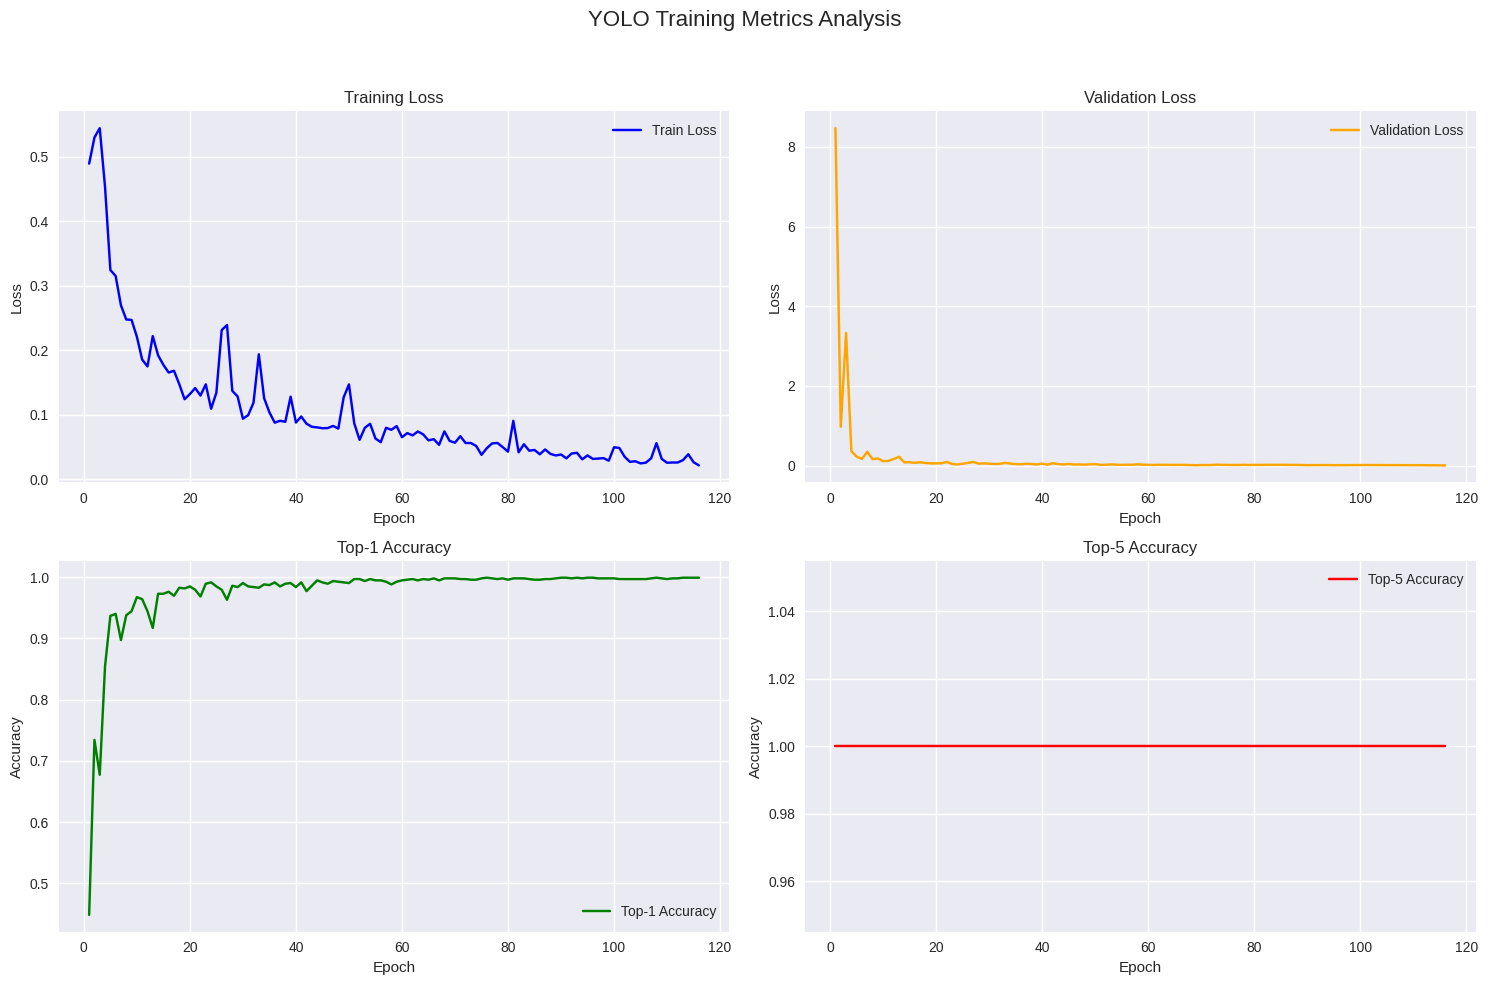

In [13]:
df = pd.read_csv('/kaggle/working/runs/classify/strawberrie_cls_model/results.csv')

plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('YOLO Training Metrics Analysis', fontsize=16)

axes[0, 0].plot(df['epoch'], df['train/loss'], label='Train Loss', color='blue')
axes[0, 0].set_title('Training Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)

axes[0, 1].plot(df['epoch'], df['val/loss'], label='Validation Loss', color='orange')
axes[0, 1].set_title('Validation Loss')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True)

axes[1, 0].plot(df['epoch'], df['metrics/accuracy_top1'], label='Top-1 Accuracy', color='green')
axes[1, 0].set_title('Top-1 Accuracy')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()
axes[1, 0].grid(True)

axes[1, 1].plot(df['epoch'], df['metrics/accuracy_top5'], label='Top-5 Accuracy', color='red')
axes[1, 1].set_title('Top-5 Accuracy')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('yolo_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

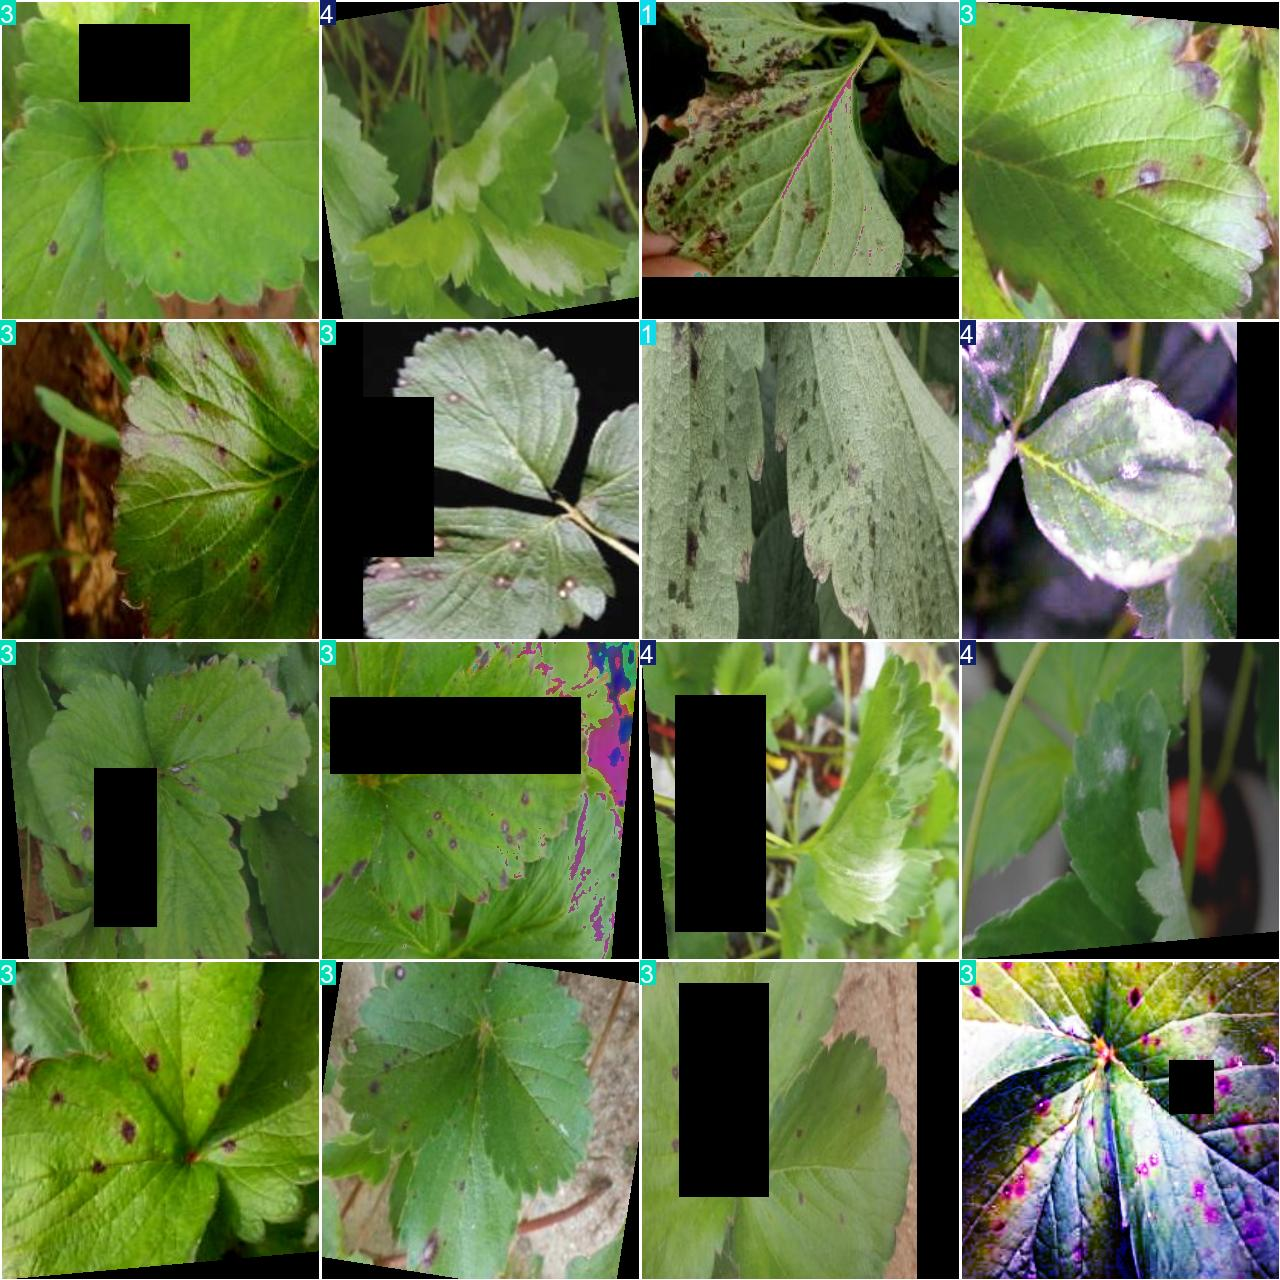

In [17]:
Image("/kaggle/working/runs/classify/strawberrie_cls_model/train_batch1.jpg", width=600)